<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [17]:
# insert code here
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [18]:
# insert code here
diabetes = load_diabetes()

### Prepare input data

In [19]:
# insert code here
X = diabetes.data

y = diabetes.target

In [20]:
X.shape

(442, 10)

In [21]:
y.shape

(442,)

### Split the data (training/test)

In [22]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Create the model's architecture

In [23]:
model = Sequential()

model.add(Dense(15, activation = 'relu', input_shape = (X.shape[1], )))

model.add(Dense(5, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))

In [24]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 5)                 80        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

In [31]:
# insert code here
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

### Fit the training data

In [33]:
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=43)

In [34]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000


24/24 [==============================] - 3s 24ms/step - loss: 30846.7578 - mse: 30846.7578 - val_loss: 26716.2031 - val_mse: 26716.2031
Epoch 2/1000
24/24 [==============================] - 0s 8ms/step - loss: 30804.0488 - mse: 30804.0488 - val_loss: 26667.3906 - val_mse: 26667.3906
Epoch 3/1000
24/24 [==============================] - 0s 7ms/step - loss: 30739.9727 - mse: 30739.9727 - val_loss: 26597.0840 - val_mse: 26597.0840
Epoch 4/1000
24/24 [==============================] - 0s 7ms/step - loss: 30649.5938 - mse: 30649.5938 - val_loss: 26496.0391 - val_mse: 26496.0391
Epoch 5/1000
24/24 [==============================] - 0s 7ms/step - loss: 30522.4434 - mse: 30522.4434 - val_loss: 26353.8848 - val_mse: 26353.8848
Epoch 6/1000
24/24 [==============================] - 0s 8ms/step - loss: 30344.8516 - mse: 30344.8516 - val_loss: 26158.0039 - val_mse: 26158.0059
Epoch 7/1000
24/24 [==============================] - 0s 8ms/step - loss: 30097.7422 - mse: 30097.7422 - val_

### Create predictions

In [35]:
# insert code here
predictions = model.predict(X_test)

5/5 [==============================] - 0s 8ms/step


In [36]:
predictions

array([[137.63298 ],
       [188.16148 ],
       [132.34857 ],
       [288.46982 ],
       [122.60346 ],
       [ 95.46725 ],
       [276.0847  ],
       [188.04886 ],
       [ 77.024895],
       [119.42231 ],
       [ 98.52202 ],
       [156.78711 ],
       [ 62.968884],
       [205.53365 ],
       [ 91.24111 ],
       [133.04079 ],
       [224.9299  ],
       [257.37415 ],
       [200.00305 ],
       [222.69444 ],
       [208.55171 ],
       [ 88.18206 ],
       [ 66.93244 ],
       [188.16756 ],
       [167.49814 ],
       [168.10219 ],
       [201.42383 ],
       [180.14984 ],
       [ 48.25922 ],
       [110.09748 ],
       [197.1468  ],
       [ 99.952614],
       [131.84915 ],
       [180.14677 ],
       [175.72643 ],
       [201.0814  ],
       [120.23827 ],
       [115.119125],
       [140.22066 ],
       [ 64.63813 ],
       [ 59.186333],
       [100.42775 ],
       [161.63434 ],
       [144.75375 ],
       [166.35043 ],
       [ 74.3679  ],
       [ 79.904274],
       [ 98.4

### Evaluate the model

In [37]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 4ms/step - loss: 2869.3020 - mse: 2869.3020

Test loss: 2869.302002


In [38]:
score

[2869.302001953125, 2869.302001953125]

### Visualisation of cost

In [39]:
# insert code here
history.history

{'loss': [30846.7578125,
  30804.048828125,
  30739.97265625,
  30649.59375,
  30522.443359375,
  30344.8515625,
  30097.7421875,
  29782.244140625,
  29384.615234375,
  28896.552734375,
  28310.462890625,
  27616.294921875,
  26806.33203125,
  25900.6796875,
  24903.56640625,
  23822.828125,
  22665.345703125,
  21423.87890625,
  20112.259765625,
  18780.4140625,
  17478.82421875,
  16134.0234375,
  14802.935546875,
  13525.2431640625,
  12284.9365234375,
  11136.0712890625,
  10096.951171875,
  9153.4140625,
  8331.7265625,
  7562.61865234375,
  6913.72021484375,
  6426.7919921875,
  5975.0986328125,
  5639.2578125,
  5376.76025390625,
  5152.23583984375,
  4962.486328125,
  4815.228515625,
  4715.94921875,
  4623.73388671875,
  4565.49169921875,
  4514.82373046875,
  4471.2646484375,
  4435.41845703125,
  4404.16357421875,
  4366.72900390625,
  4348.7451171875,
  4314.2529296875,
  4289.85107421875,
  4270.03564453125,
  4251.25634765625,
  4231.57373046875,
  4208.1962890625,
  419

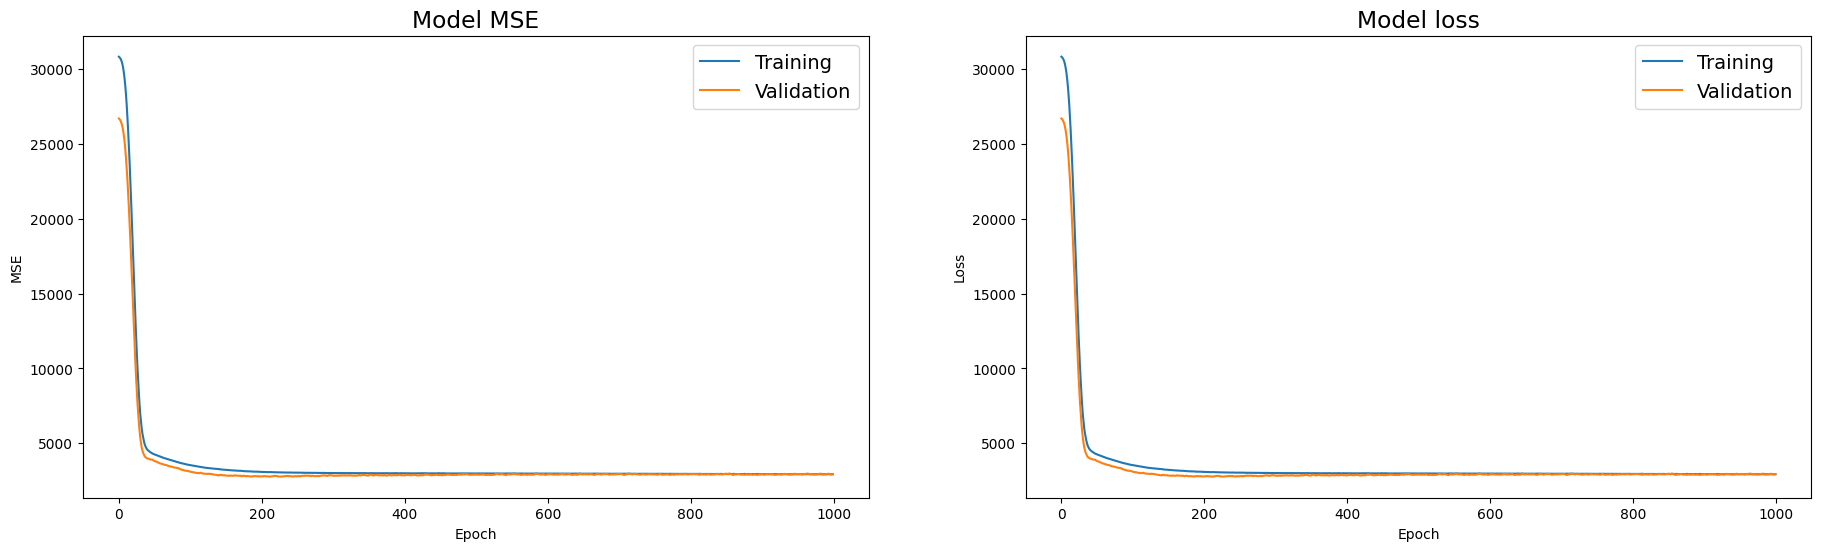

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [41]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

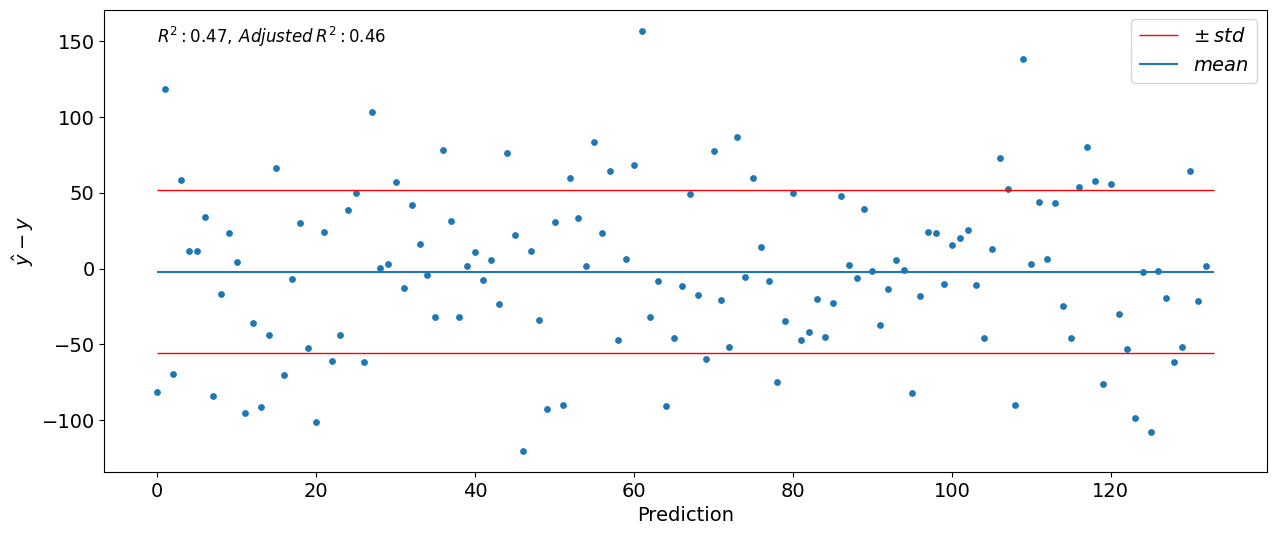

In [42]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



